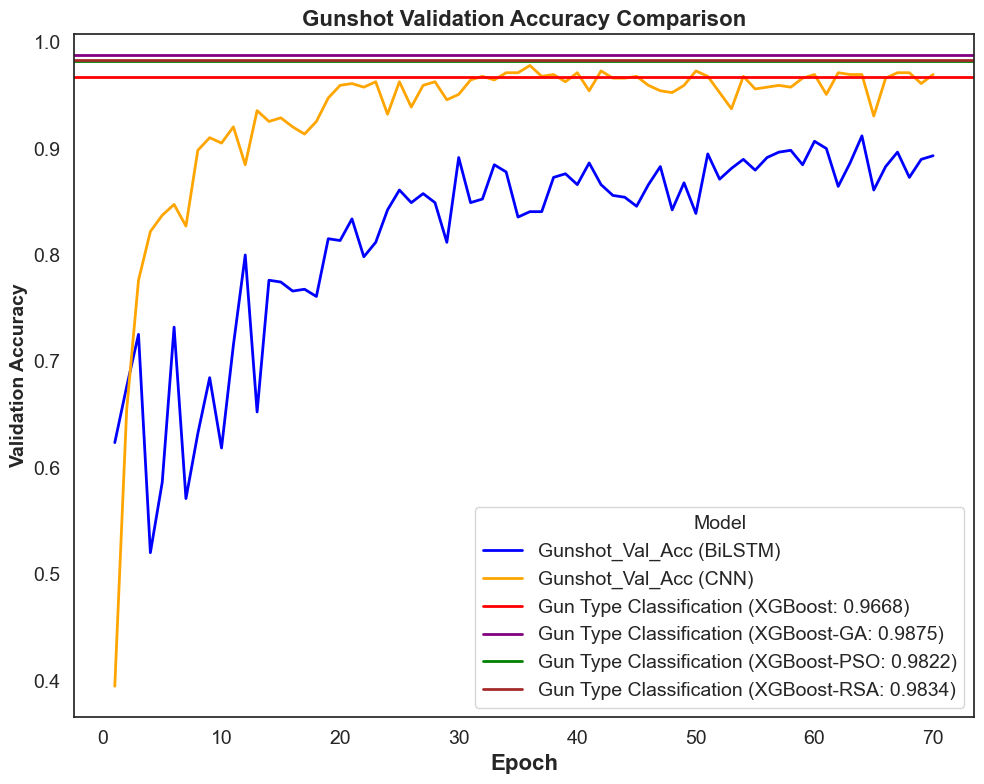

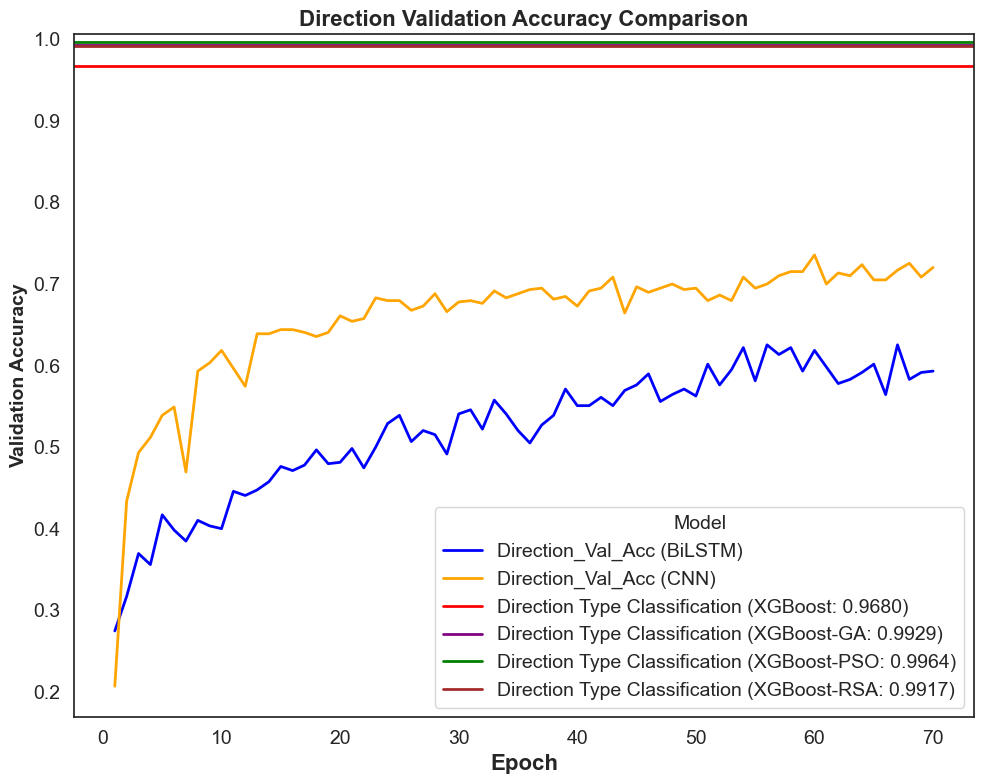

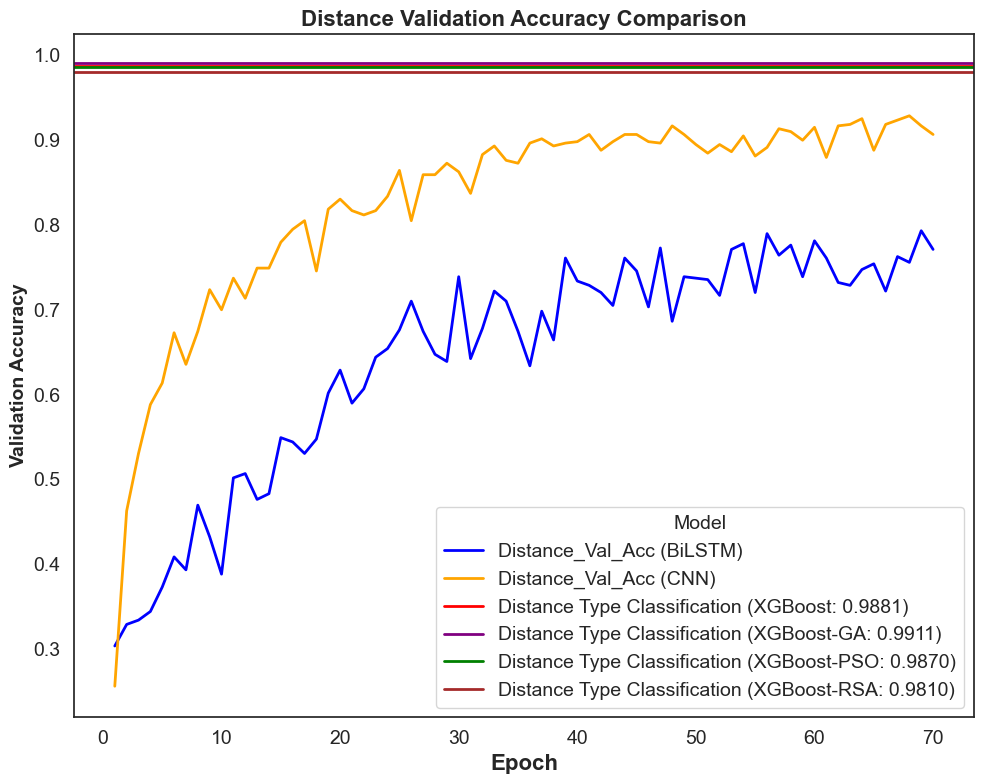

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_accuracies = pd.read_csv('test_accuracies.csv')
validation_accuracies = pd.read_csv('validation_accuracies.csv')
validation_cnn_accuracies = pd.read_csv('validation_cnn_accuracies.csv')
test_accuracies_xgGA = pd.read_csv('test_accuracies_xgGA.csv')
test_accuracies_xgPSO = pd.read_csv('test_accuracies_xgPSO.csv')
test_accuracies_xgRSA = pd.read_csv('test_accuracies_xgRSA.csv')

def plot_simplified_comparison(feature, xgboost_metric, title):
    plt.figure(figsize=(10, 8))
    sns.set_theme(style="white")

    sns.lineplot(
        x=validation_accuracies['Epoch'], 
        y=validation_accuracies[feature], 
        label=f'{feature} (BiLSTM)', 
        linewidth=2, 
        color='blue'
    )

    sns.lineplot(
        x=validation_cnn_accuracies['Epoch'], 
        y=validation_cnn_accuracies[feature], 
        label=f'{feature} (CNN)', 
        linewidth=2, 
        color='orange'
    )
    def plot_xgboost_variant(dataframe, color, label_suffix):
        if xgboost_metric in dataframe['Metric'].values:
            accuracy = dataframe.loc[dataframe['Metric'] == xgboost_metric, 'Accuracy'].values[0]
            plt.axhline(
                y=accuracy, 
                color=color, 
                linestyle='-', 
                linewidth=2, 
                label=f'{xgboost_metric} (XGBoost{label_suffix}: {accuracy:.4f})'
            )
        else:
            print(f"Warning: '{xgboost_metric}' not found in the given DataFrame.")

    plot_xgboost_variant(test_accuracies, 'red', '')
    plot_xgboost_variant(test_accuracies_xgGA, 'purple', '-GA')
    plot_xgboost_variant(test_accuracies_xgPSO, 'green', '-PSO')
    plot_xgboost_variant(test_accuracies_xgRSA, 'brown', '-RSA')

    plt.title(f'{title} Validation Accuracy Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=16, fontweight='bold')
    plt.ylabel('Validation Accuracy', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14, loc='lower right', title='Model', title_fontsize='14', frameon=True, fancybox=True)
    plt.tight_layout()
    plt.show()

plot_simplified_comparison('Gunshot_Val_Acc', 'Gun Type Classification', 'Gunshot')
plot_simplified_comparison('Direction_Val_Acc', 'Direction Type Classification', 'Direction')
plot_simplified_comparison('Distance_Val_Acc', 'Distance Type Classification', 'Distance')


C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2381168621.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


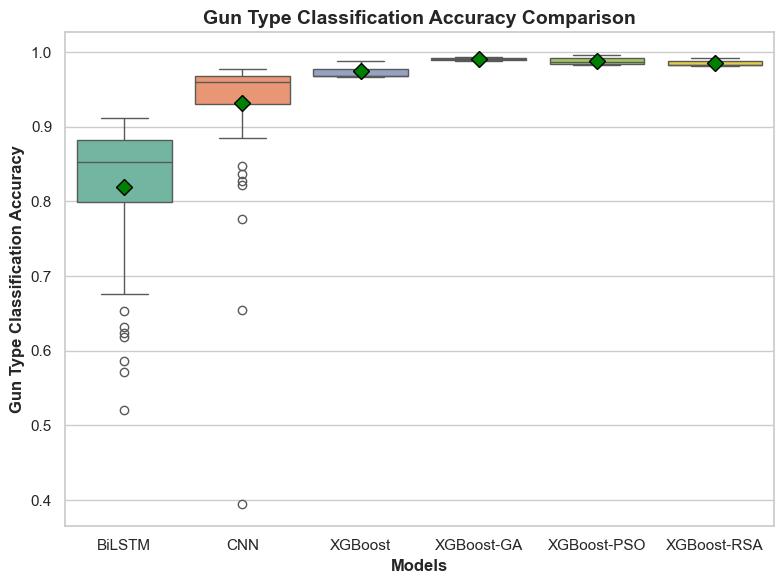

C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2381168621.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


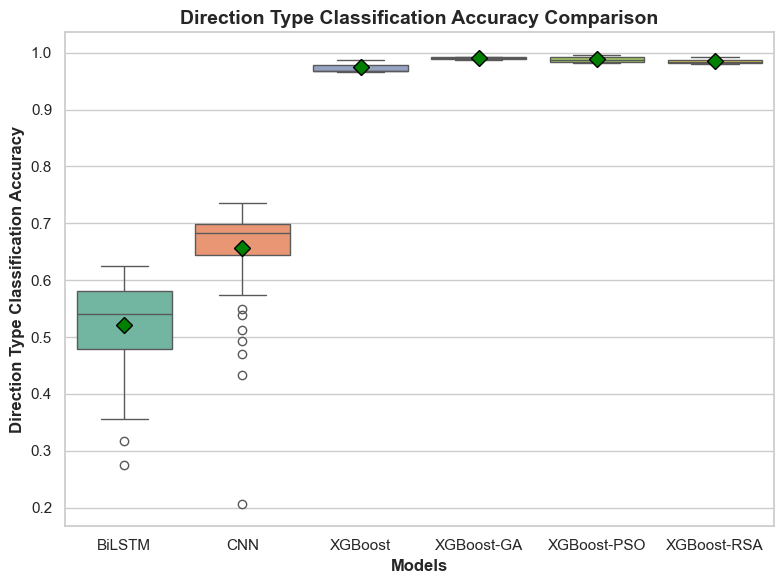

C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2381168621.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


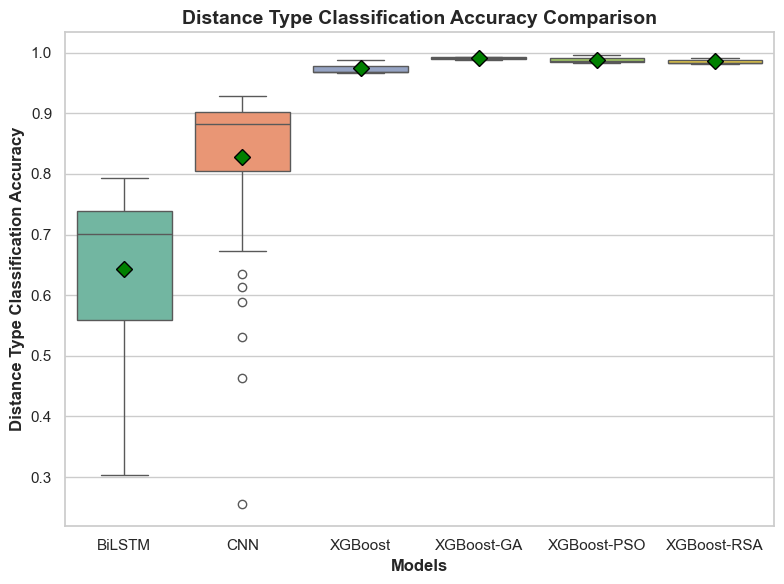

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files
validation_accuracies = pd.read_csv('validation_accuracies.csv')
validation_cnn_accuracies = pd.read_csv('validation_cnn_accuracies.csv')
test_accuracies = pd.read_csv('test_accuracies.csv')
test_accuracies_xgGA = pd.read_csv('test_accuracies_xgGA.csv')
test_accuracies_xgPSO = pd.read_csv('test_accuracies_xgPSO.csv')
test_accuracies_xgRSA = pd.read_csv('test_accuracies_xgRSA.csv')

# Prepare data for Gun Type Classification Accuracy
gunshot_data = {
    'Model': (['BiLSTM'] * len(validation_accuracies) +
              ['CNN'] * len(validation_cnn_accuracies) +
              ['XGBoost'] * len(test_accuracies) +
              ['XGBoost-GA'] * len(test_accuracies_xgGA) +
              ['XGBoost-PSO'] * len(test_accuracies_xgPSO) +
              ['XGBoost-RSA'] * len(test_accuracies_xgRSA)),
    'Gun Type Classification Accuracy': (list(validation_accuracies['Gunshot_Val_Acc']) +
                                          list(validation_cnn_accuracies['Gunshot_Val_Acc']) +
                                          list(test_accuracies['Accuracy']) +
                                          list(test_accuracies_xgGA['Accuracy']) +
                                          list(test_accuracies_xgPSO['Accuracy']) +
                                          list(test_accuracies_xgRSA['Accuracy']))
}

# Prepare data for Direction Type Classification Accuracy
direction_data = {
    'Model': gunshot_data['Model'],
    'Direction Type Classification Accuracy': (list(validation_accuracies['Direction_Val_Acc']) +
                                               list(validation_cnn_accuracies['Direction_Val_Acc']) +
                                               list(test_accuracies['Accuracy']) +
                                               list(test_accuracies_xgGA['Accuracy']) +
                                               list(test_accuracies_xgPSO['Accuracy']) +
                                               list(test_accuracies_xgRSA['Accuracy']))
}

# Prepare data for Distance Type Classification Accuracy
distance_data = {
    'Model': gunshot_data['Model'],
    'Distance Type Classification Accuracy': (list(validation_accuracies['Distance_Val_Acc']) +
                                              list(validation_cnn_accuracies['Distance_Val_Acc']) +
                                              list(test_accuracies['Accuracy']) +
                                              list(test_accuracies_xgGA['Accuracy']) +
                                              list(test_accuracies_xgPSO['Accuracy']) +
                                              list(test_accuracies_xgRSA['Accuracy']))
}

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Gun Type Classification Accuracy Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Model', y='Gun Type Classification Accuracy', data=pd.DataFrame(gunshot_data),
    palette="Set2", showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "green", "markeredgecolor": "black", "markersize": 8}
)
plt.title('Gun Type Classification Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Gun Type Classification Accuracy', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('gun_type_classification_accuracy.png')
plt.show()

# Direction Type Classification Accuracy Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Model', y='Direction Type Classification Accuracy', data=pd.DataFrame(direction_data),
    palette="Set2", showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "green", "markeredgecolor": "black", "markersize": 8}
)
plt.title('Direction Type Classification Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Direction Type Classification Accuracy', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('direction_type_classification_accuracy.png')
plt.show()

# Distance Type Classification Accuracy Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Model', y='Distance Type Classification Accuracy', data=pd.DataFrame(distance_data),
    palette="Set2", showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "green", "markeredgecolor": "black", "markersize": 8}
)
plt.title('Distance Type Classification Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Distance Type Classification Accuracy', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('distance_type_classification_accuracy.png')
plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\4212744981.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\4212744981.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


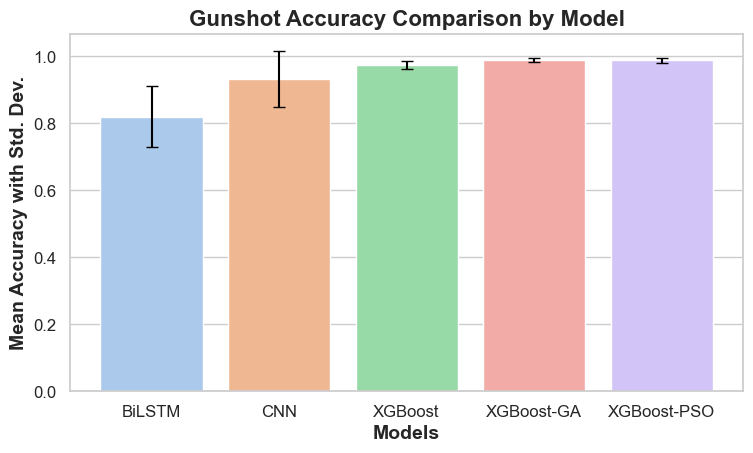

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files
validation_accuracies = pd.read_csv('validation_accuracies.csv')
validation_cnn_accuracies = pd.read_csv('validation_cnn_accuracies.csv')
test_accuracies = pd.read_csv('test_accuracies.csv')
test_accuracies_xgGA = pd.read_csv('test_accuracies_xgGA.csv')
test_accuracies_xgPSO = pd.read_csv('test_accuracies_xgPSO.csv')

# Prepare data for Gunshot Accuracy
gunshot_data = {
    'Model': (['BiLSTM'] * len(validation_accuracies) +
              ['CNN'] * len(validation_cnn_accuracies) +
              ['XGBoost'] * len(test_accuracies) +
              ['XGBoost-GA'] * len(test_accuracies_xgGA) +
              ['XGBoost-PSO'] * len(test_accuracies_xgPSO)),
    'Accuracy': (list(validation_accuracies['Gunshot_Val_Acc']) +
                 list(validation_cnn_accuracies['Gunshot_Val_Acc']) +
                 list(test_accuracies['Accuracy']) +
                 list(test_accuracies_xgGA['Accuracy']) +
                 list(test_accuracies_xgPSO['Accuracy']))
}

# Function to create bar plots
def create_bar_plot(data, title, ylabel, filename):
    df = pd.DataFrame(data)
    summary_stats = df.groupby('Model')['Accuracy'].agg(['mean', 'std']).reset_index()

    # Correct shape mismatch by converting std to an array
    std_values = summary_stats['std'].values

    # Plot
    plt.figure(figsize=(8, 5))  # Adjusted figure size
    sns.barplot(
        x='Model',
        y='mean',
        data=summary_stats,
        palette="pastel",
        ci=None  # Disable internal confidence interval calculations
    )
    
    # Add error bars manually
    plt.errorbar(
        x=range(len(summary_stats['mean'])),
        y=summary_stats['mean'],
        yerr=std_values,
        fmt='none',
        c='black',
        capsize=4  # Adjusted capsize for consistency
    )

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Models', fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout(pad=2.0)  # Added padding to ensure consistent margins

    # Save the plot as an image file
    plt.savefig(filename)
    plt.show()

# Create the Gunshot Accuracy plot
create_bar_plot(
    gunshot_data,
    title='Gunshot Accuracy Comparison by Model',
    ylabel='Mean Accuracy with Std. Dev.',
    filename='gunshot_accuracy_barplot.png'
)


In [4]:
print(test_accuracies['Metric'].unique())
print(test_accuracies_xgGA['Metric'].unique())
print(test_accuracies_xgPSO['Metric'].unique())


['Gun Type Classification' 'Direction Type Classification'
 'Distance Type Classification']
['Gun Type Classification' 'Direction Type Classification'
 'Distance Type Classification']
['Gun Type Classification' 'Direction Type Classification'
 'Distance Type Classification']


C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


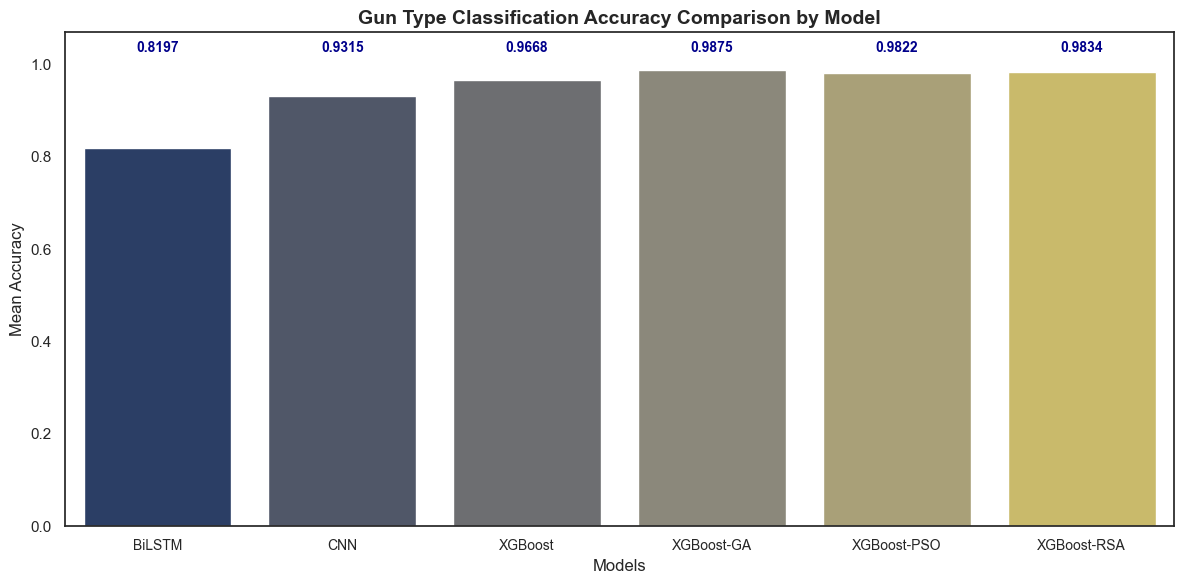

C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


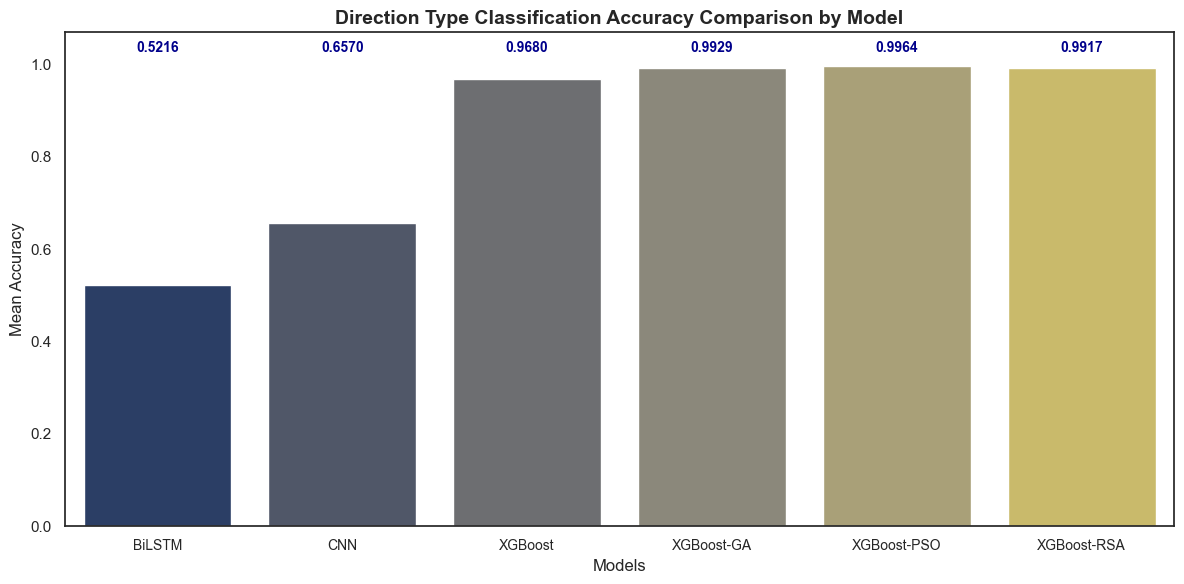

C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\abhin\AppData\Local\Temp\ipykernel_24064\2932325532.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


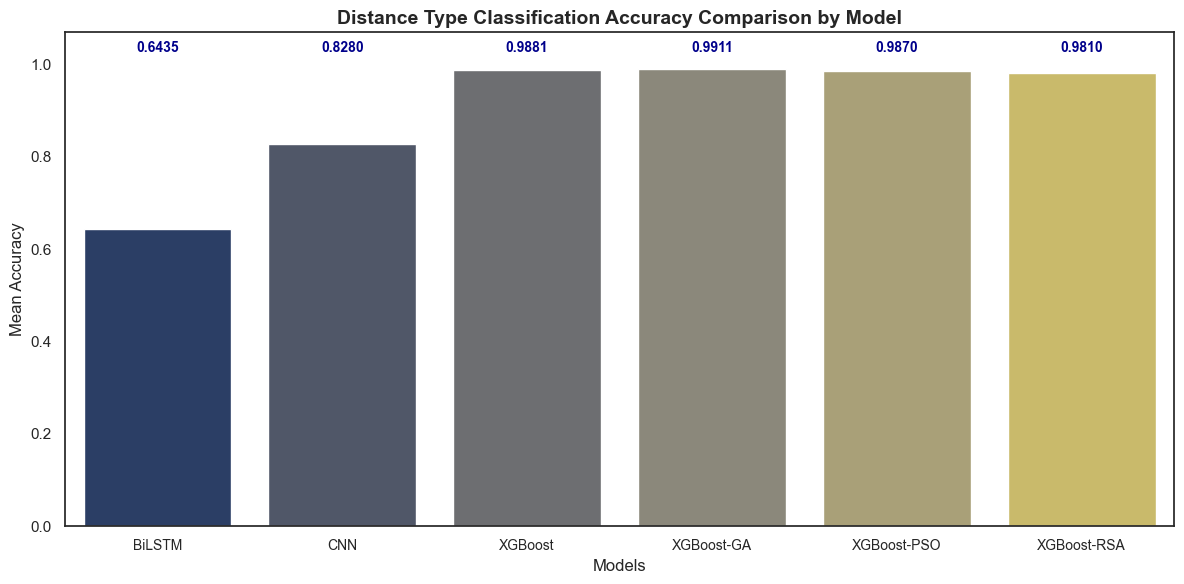

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics info
metrics_info = [
    {'metric': 'Gun Type Classification', 'val_key': 'Gunshot_Val_Acc'},
    {'metric': 'Direction Type Classification', 'val_key': 'Direction_Val_Acc'},
    {'metric': 'Distance Type Classification', 'val_key': 'Distance_Val_Acc'}
]

def prepare_data(metric_name, val_key):
    # Filter data for the chosen metric
    xgboost_accuracies = test_accuracies[test_accuracies['Metric'] == metric_name]
    xgboost_ga_accuracies = test_accuracies_xgGA[test_accuracies_xgGA['Metric'] == metric_name]
    xgboost_pso_accuracies = test_accuracies_xgPSO[test_accuracies_xgPSO['Metric'] == metric_name]
    xgboost_rsa_accuracies = test_accuracies_xgRSA[test_accuracies_xgRSA['Metric'] == metric_name]
    
    # Prepare data for plotting
    data = {'Model': [], 'Accuracy': []}

    # Append BiLSTM and CNN accuracies
    data['Model'].extend(['BiLSTM'] * len(validation_accuracies))
    data['Accuracy'].extend(list(validation_accuracies[val_key]))

    data['Model'].extend(['CNN'] * len(validation_cnn_accuracies))
    data['Accuracy'].extend(list(validation_cnn_accuracies[val_key]))

    # Append XGBoost, XGBoost-GA, XGBoost-PSO, and XGBoost-RSA accuracies
    data['Model'].extend(['XGBoost'] * len(xgboost_accuracies))
    data['Accuracy'].extend(list(xgboost_accuracies['Accuracy']))

    data['Model'].extend(['XGBoost-GA'] * len(xgboost_ga_accuracies))
    data['Accuracy'].extend(list(xgboost_ga_accuracies['Accuracy']))

    data['Model'].extend(['XGBoost-PSO'] * len(xgboost_pso_accuracies))
    data['Accuracy'].extend(list(xgboost_pso_accuracies['Accuracy']))
    
    data['Model'].extend(['XGBoost-RSA'] * len(xgboost_rsa_accuracies))
    data['Accuracy'].extend(list(xgboost_rsa_accuracies['Accuracy']))

    return data

def create_bar_plot(data, title, ylabel, filename):
    df = pd.DataFrame(data)
    summary_stats = df.groupby('Model')['Accuracy'].agg(['mean', 'std']).reset_index()

    # Extract mean values
    mean_values = summary_stats['mean']

    # Plot
    plt.figure(figsize=(12, 6))
    sns.set(style="white")
    ax = sns.barplot(
        x='Model',
        y='mean',
        data=summary_stats,
        palette="cividis",
        ci=None
    )

    # Add labels at the top of each bar in the upper margin
    upper_margin = 1.02  # Place numbers slightly above the y-axis limit
    for i, mean in enumerate(mean_values):
        ax.text(
            i,  # Bar position
            upper_margin,  # Position in the upper margin
            f'{mean:.4f}',  # Label with 4 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkblue'
        )

    # Adjust y-axis to always show 1.00 and add top margin
    plt.ylim(0, 1.07)  # Add some margin above 1.00 for the text

    # Customize plot appearance
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig(filename, bbox_inches='tight')  # Ensure tight layout with margins
    plt.show()

# Generate bar plots for all metrics
for metric_info in metrics_info:
    data = prepare_data(metric_info['metric'], metric_info['val_key'])
    create_bar_plot(
        data,
        title=f"{metric_info['metric']} Accuracy Comparison by Model",
        ylabel='Mean Accuracy',
        filename=f"{metric_info['metric'].lower().replace(' ', '_')}_accuracy_plot.png"
    )
